### 贝叶斯回归

In [11]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

In [12]:
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)

In [13]:
relevant_features

array([12, 16, 20, 33, 75, 28, 89, 19, 92, 42])

####  生成10个权重值(服从（0, 1/4）的正态分布)， 具体可以参考共轭分布，高斯分布的共轭先验分布

In [14]:
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

In [15]:
w

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.15880809,  0.        ,  0.        ,
        0.        , -0.25300608,  0.        ,  0.        , -0.30161441,
       -0.43132523,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.79304575,  0.        ,
        0.        ,  0.        ,  0.        , -0.2880708 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.41199273,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [17]:
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

In [20]:
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)
ols = LinearRegression()
ols.fit(X, y);

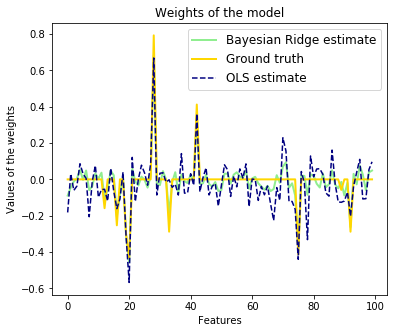

In [23]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.show()

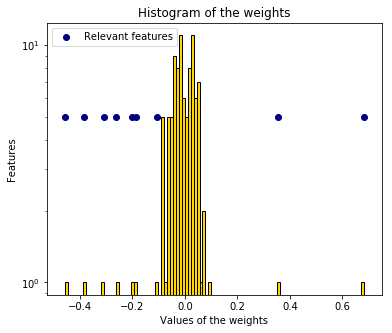

array([ -8.93312563e-02,  -4.46837742e-02,  -1.13911733e-02,
         3.97551963e-03,   5.33389532e-02,  -2.61782952e-03,
         4.87401237e-02,  -5.93921949e-02,  -3.74862746e-02,
         3.31692638e-02,   3.36954060e-03,   3.68355997e-02,
        -1.06305353e-01,  -5.57482764e-02,   4.83997239e-02,
         2.20136883e-02,  -2.03486970e-01,  -8.30468503e-02,
         1.29236092e-02,  -3.09051695e-01,  -4.56762096e-01,
         5.78680168e-02,  -1.13797085e-02,  -3.32601813e-02,
         1.50274242e-02,  -2.55290169e-03,  -4.55005927e-02,
         1.89238175e-02,   6.81845161e-01,  -2.17102907e-02,
        -3.20231808e-02,   4.54049772e-02,  -9.06964385e-05,
        -1.85585040e-01,  -1.54193943e-02,   3.93144875e-02,
        -7.31801178e-02,   2.70735024e-02,  -1.03661681e-02,
        -2.02162019e-02,   2.64089306e-02,  -5.52486421e-03,
         3.53218516e-01,  -2.53865114e-02,  -2.15353231e-02,
         2.50346318e-02,  -2.52496158e-02,  -3.99808800e-02,
        -1.49039247e-02,

In [32]:
plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=100, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")
plt.show()
clf.coef_

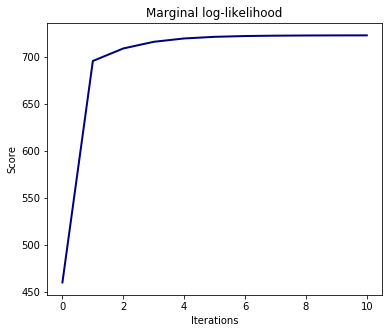

In [26]:
plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

In [33]:
import math

In [34]:
math.log10(215)

2.3324384599156054

In [35]:
np.logspace(2, 3, 4)

array([  100.        ,   215.443469  ,   464.15888336,  1000.        ])

In [46]:
# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()

###  生成范德蒙矩阵

In [42]:
np.vander(X, degree).shape

(100, 10)

### 贝叶斯回归不仅适用于线性回归，还适用于非线性回归，但是要求噪声是高斯噪声

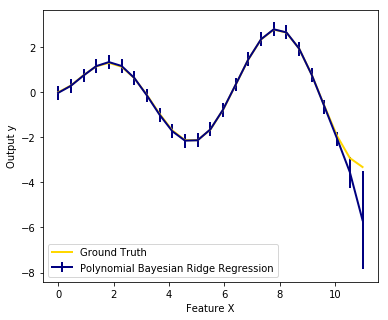

In [45]:
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()